<a href="https://colab.research.google.com/github/utopickaiser/AI-Homework/blob/main/Class_IMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Khai báo và sử dụng các thư viện sau
from keras.models import Sequential, Model 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from numpy import asarray
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [2]:
# Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Di chuyển tới thư mục VNMoney
%cd /content/drive/MyDrive/Class IMG

/content/drive/MyDrive/Class IMG


In [4]:
# Khởi tạo dữ liệu cho quá trình training
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training = train_datagen.flow_from_directory('/content/drive/MyDrive/Class IMG/train',target_size = (150,150), batch_size = 32,class_mode='categorical')
validation=train_data.flow_from_directory('/content/drive/MyDrive/Class IMG/valid',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1117 images belonging to 24 classes.
Found 288 images belonging to 24 classes.


In [5]:

# Kiểm tra các thuộc tính của tập dữ liệu training
training.class_indices
# Kiểm tra các thuộc tính của tập dữ liệu validation
validation.class_indices

{'Binh': 0,
 'Dang Khoa': 1,
 'Dung': 2,
 'HQHuy': 3,
 'Ha': 4,
 'Ha Kiet': 5,
 'Hau': 6,
 'Hieu': 7,
 'Hoai Phong': 8,
 'Hoang': 9,
 'HuuLong': 10,
 'Kiet': 11,
 'KyAnh': 12,
 'Loc': 13,
 'Luan': 14,
 'Phat': 15,
 'Phuc': 16,
 'Sang': 17,
 'Thai': 18,
 'Thang': 19,
 'Thanh': 20,
 'Thao': 21,
 'Thinh': 22,
 'Tien': 23}

In [6]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [7]:
# Biên dịch 
model.compile(
    optimizer = 'Adam',
    loss='categorical_crossentropy',
    metrics = 'accuracy'
)
model.summary()
# Tiến hành quá trình training
train = model.fit(training,epochs = 30,validation_data=validation,verbose = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [8]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.004545941948890686
Train Accuracy 0.9991047382354736


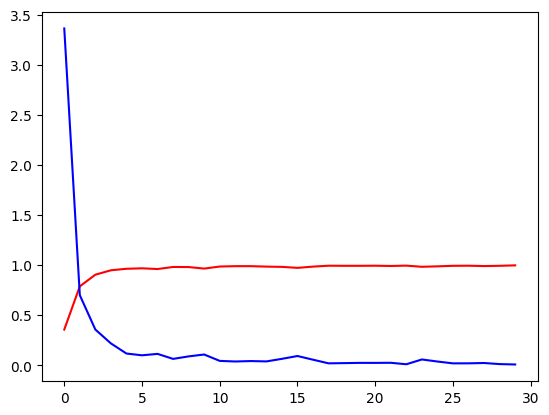

In [9]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot( epochs, accuracy, 'r', label = 'Training accuracy')
plt.plot( epochs, loss, 'b', label = 'Training loss')
plt.show()

In [10]:
# Lưu 
from google.colab import drive
model.save('IMG Class.h5')

In [11]:
# Load model vừa lưu
from tensorflow.keras.models import load_model
model_1=load_model('/content/drive/MyDrive/Class IMG/IMG Class.h5')

1/1 [==============================] - 0s 463ms/step
Dang Khoa


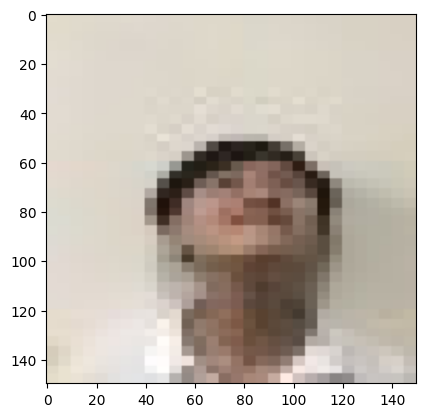

1/1 [==============================] - 0s 38ms/step
Phat


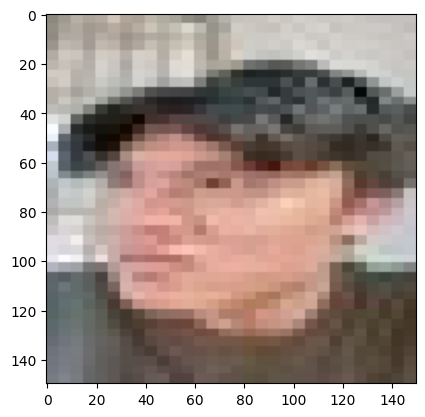

1/1 [==============================] - 0s 35ms/step
Phuc


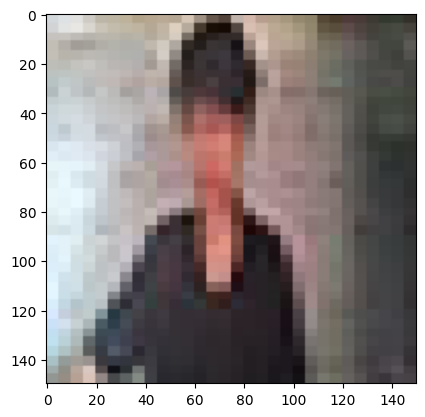

1/1 [==============================] - 0s 24ms/step
Hoang


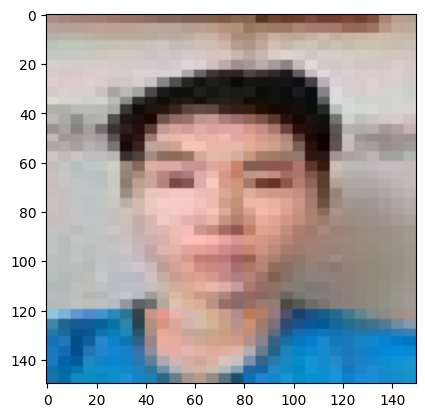

1/1 [==============================] - 0s 23ms/step
Ha


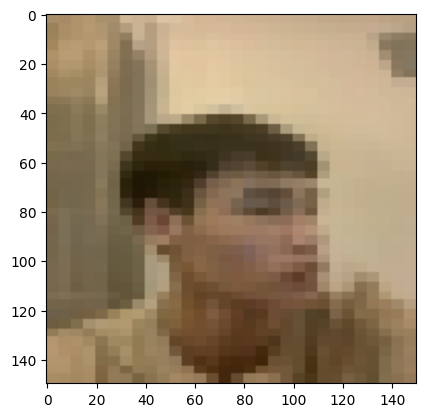

In [12]:
# Chạy thử kết quả
test="/content/drive/MyDrive/Class IMG/test"

for i in listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Binh',
 'Dang Khoa',
 'Dung',
 'HQHuy',
 'Ha',
 'Ha Kiet',
 'Hau',
 'Hieu',
 'Hoai Phong',
 'Hoang',
 'HuuLong',
 'Kiet',
 'KyAnh',
 'Loc',
 'Luan',
 'Phat',
 'Phuc',
 'Sang',
 'Thai',
 'Thang',
 'Thanh',
 'Thao',
 'Thinh',
 'Tien']
  print(class_name[result])
  plt.show()
  